# Pytorch Custom Datasets

- getting our own data into PyTorch

In [ ]:
import torch
from torch.utils.data import Dataset
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Get Data

Our DataSet is a subset of the Food101 dataset (101  classes with 1k images per class)

Our dataset starts with 3 classses of food and only 10% of the images



In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path for Data Folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza,steak and sushi data

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip the data

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak, sushi data...


# Data preparation and data exploration

In [ ]:
from os.path import dirname
import os
def walk_through_dir(dir_path):
  """Walk thorugh dir_path returning its contents"""

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [ ]:
# Setup train and testing path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# Visualizing an image using code

* get all the images paths
* pick a random image path using `random.choice()`
* get the image class name using `pathlib.Path.parent.stem`
* since we're working with images will open the image with Pythin PIL
* show the image and print metadata

Random image path: data/pizza_steak_sushi/test/pizza/3475871.jpg
Image class name: pizza
Image size: (512, 512)


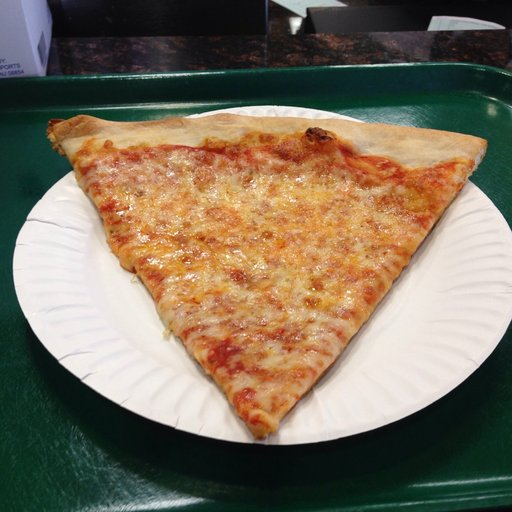

In [ ]:
import random
from PIL import Image

# seed
random.seed(42)

# get all the img paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_img = random.choice(image_path_list)

# get the img class name from the path name
class_name = random_img.parent.stem

# open the image
img = Image.open(random_img)

# print metadata
print(f"Random image path: {random_img}")
print(f"Image class name: {class_name}")
print(f"Image size: {img.size}")
img

# Visualize image with matplotlib

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

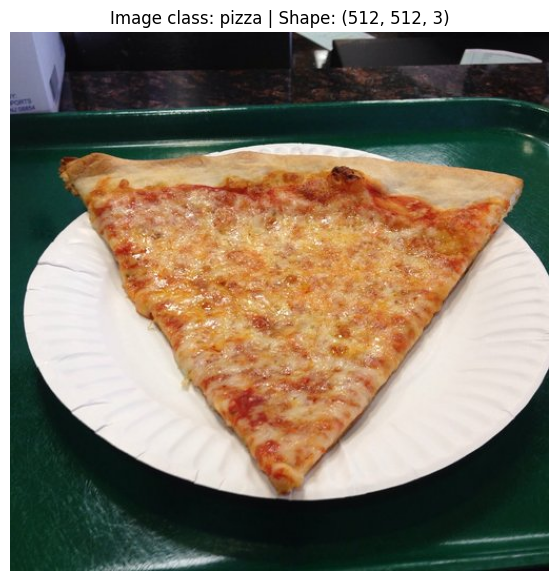

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into array
img_array = np.asarray(img)

# plot the img with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_array)
plt.title(f"Image class: {class_name} | Shape: {img_array.shape}")
plt.axis(False)

array([[[137, 137, 163],
        [136, 136, 162],
        [135, 135, 161],
        ...,
        [  7,   7,   9],
        [  7,   7,   9],
        [  7,   7,   9]],

       [[136, 136, 162],
        [136, 136, 162],
        [135, 135, 161],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[134, 134, 160],
        [134, 134, 160],
        [135, 135, 163],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       ...,

       [[ 11,  48,  30],
        [  9,  46,  28],
        [  9,  46,  28],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[ 13,  50,  32],
        [ 11,  48,  30],
        [ 10,  47,  29],
        ...,
        [ 10,   5,   9],
        [  9,   4,   8],
        [  9,   4,   8]],

       [[ 14,  51,  33],
        [ 12,  49,  31],
        [ 11,  48,  30],
        ...,
        [ 10,   4,   8],
        [  9,   3,   7],
        [  9,   3,   7]]], dtype=uint8)
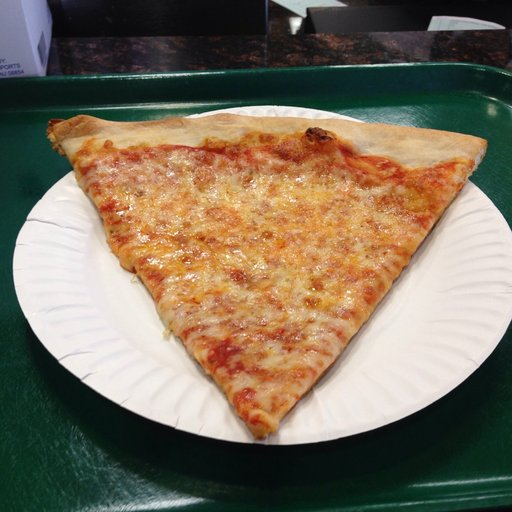

In [ ]:
img_array

# Transforming data

Before we use our image data with PyTorch:
* turn your target data into tensor
* turn it into a `torch.utils.data.Dataset` then a `toech.utils.data.DataLoader` (Datset and DataLoader)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transform data with `torchvision.transforms`

In [ ]:
# write a transform for img
data_transform = transforms.Compose([
  # resize our image 64 * 64
  transforms.Resize((64,64)),
  # flip the images randomly
  transforms.RandomHorizontalFlip(p=0.5),
  # turn the image into a torch tensor
  transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.5255, 0.5333, 0.5569,  ..., 0.0353, 0.0353, 0.0392],
         [0.5098, 0.5216, 0.5373,  ..., 0.0431, 0.0431, 0.0471],
         [0.4980, 0.5098, 0.5176,  ..., 0.2118, 0.1098, 0.0627],
         ...,
         [0.0353, 0.0431, 0.0471,  ..., 0.0980, 0.0902, 0.0824],
         [0.0392, 0.0431, 0.0471,  ..., 0.0902, 0.0863, 0.0824],
         [0.0392, 0.0431, 0.0471,  ..., 0.0510, 0.0471, 0.0431]],

        [[0.5294, 0.5373, 0.5686,  ..., 0.0353, 0.0353, 0.0392],
         [0.5216, 0.5294, 0.5529,  ..., 0.0431, 0.0431, 0.0471],
         [0.5137, 0.5216, 0.5373,  ..., 0.2078, 0.1059, 0.0588],
         ...,
         [0.1804, 0.1882, 0.1961,  ..., 0.2627, 0.2549, 0.2471],
         [0.1843, 0.1882, 0.2000,  ..., 0.2471, 0.2431, 0.2314],
         [0.1843, 0.1882, 0.1961,  ..., 0.1294, 0.1098, 0.0980]],

        [[0.6392, 0.6549, 0.7020,  ..., 0.0431, 0.0431, 0.0471],
         [0.6392, 0.6510, 0.6824,  ..., 0.0510, 0.0510, 0.0549],
         [0.6275, 0.6392, 0.6627,  ..., 0.2235, 0.1176, 0.

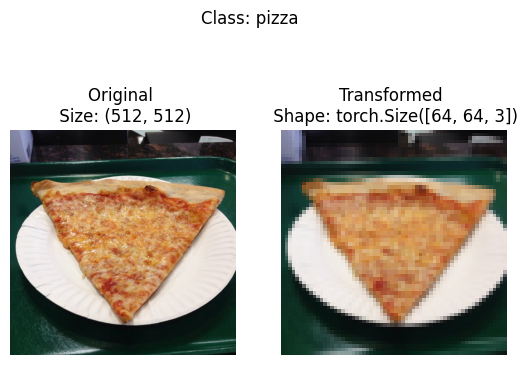

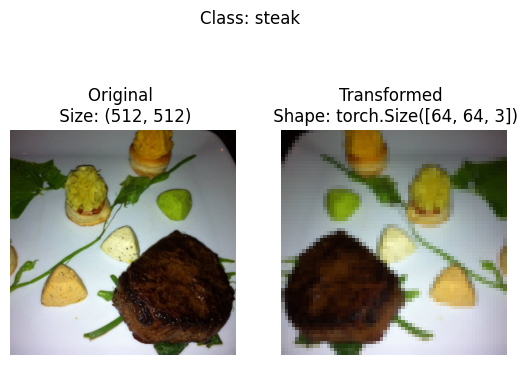

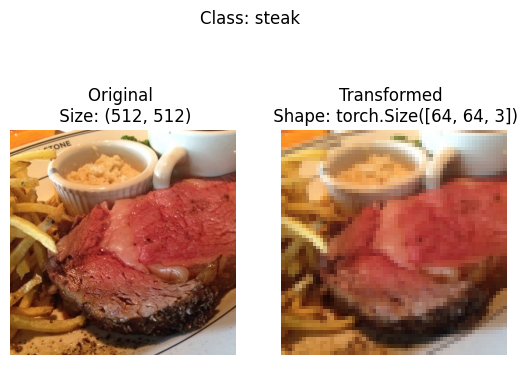

In [ ]:
def plot_trans_imgs(image_paths: list,transform, n=3, seed=42):
  """
  Selects rand img's from a path ofimages
  -> loads/transforms them
  -> plots orginal vs transformed images
  """
  if seed:
    random.seed(seed)
  random_img_paths = random.sample(image_paths,k=n)
  for img_path in random_img_paths:
    with Image.open(img_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size: {f.size}")
      ax[0].axis("off")

      # transform the image
      transformed_img = transform(f).permute(dims=(1, 2, 0)) # change shape for matplotlib with permute()
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed \n Shape: {transformed_img.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {img_path.parent.stem}")

plot_trans_imgs(image_paths=image_path_list,
                  transform=data_transform)


# Option 1: loading img data using `ImageFolder`

In [ ]:
# use ImageFolder to create datasets
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# get class names as a list
class_names = train_data.classes

In [ ]:
train_data.samples[:10] # taking a look at first 10 samples

[('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1033251.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1044789.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1089334.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1105700.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/12301.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1285298.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/138855.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1412034.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1524655.jpg', 0)]

In [ ]:
# index on the train_data to get a single img and label
img, label = train_data[0][0], train_data[0][1]
img
print(f"Image shape: {img.shape}")
print(f"Label: {label}, Target class: {class_names[label]}, Dtype {type(label)}")

Image shape: torch.Size([3, 64, 64])
Label: 0, Target class: pizza, Dtype <class 'int'>


Image shape: torch.Size([3, 64, 64]) -> torch.Size([64, 64, 3])
Label: 0, Target class: pizza, Dtype <class 'int'>


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

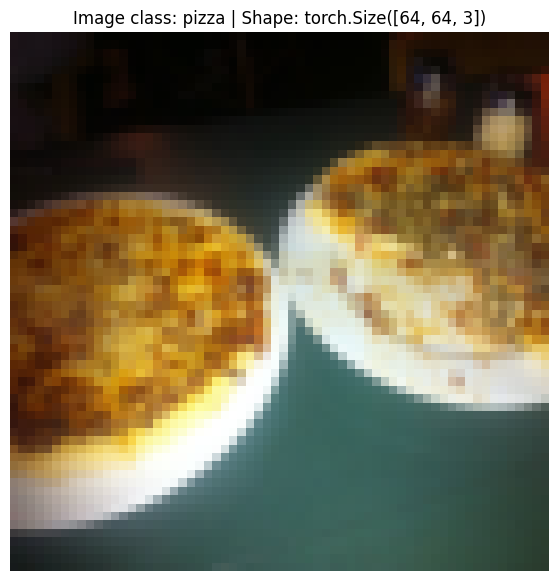

In [ ]:
# rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out the different shapes
print(f"Image shape: {img.shape} -> {img_permute.shape}")
print(f"Label: {label}, Target class: {class_names[label]}, Dtype {type(label)}")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image class: {class_names[label]} | Shape: {img_permute.shape}")
plt.axis("off")

# Turn loaded images into `DataLoader`'s

In [ ]:

BATCH_SIZE = 1
train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=os.cpu_count(),
                          pin_memory=True)

test_loader = DataLoader(dataset=test_data,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          num_workers=os.cpu_count(),
                          pin_memory=True)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7d2841b7b350>,
 <torch.utils.data.dataloader.DataLoader at 0x7d2841b5b010>)

In [ ]:
len(train_loader), len(test_loader)

(225, 75)

In [ ]:
img, label = next(iter(train_loader))

# batch size wil be 1
print(f"Image shape: {img.shape}")
print(f"Label: {label}, {class_names[label]}")

Image shape: torch.Size([1, 3, 64, 64])
Label: tensor([1]), steak


# Option 2: Loading Image Data with a custom `Dataset`

* to be able to load images from file
* to be able to get class names from dataset
* to be able to classes as dictionary from dataset



In [ ]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# Creating a helper fuction to get class names

* get the class names using `os.scandir()` to traverse a target directoty (ideally on standard image classification format)
* raise an error if the class names aren't found
* turn the class names into a dict and a list and return them

In [ ]:
# Setup path for target directory
target_directory = train_dir
target_directory

# get the class names from the target directory
class_names_found = sorted(entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir())
class_names_found

['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory
  """

  # get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # raise an error if class names not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  # create dictonary of index labels
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

Replicate functionality of getting the class names and a dictionary indexing the class names

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# Create a custom `Dataset` to replicate `ImageFolder`

* all datasets that represent a map from keys to data samples should subclass `torch.utils.data.Dataset`
* create sevaral attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of target classes
  * class_to_idx - a dict of the target classes mapped to int labels

* create a function to `load_images()`
* overwrite the `__len()__` methid
* overwrite the `__getitem()__`

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  # initialize our custom data set
  def __init__(self, targ_dir: str, transform=None):
    # create class attributes
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    "Loads and returns PIL image"
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    "Returns the total number of samples"
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label(X, y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx




In [ ]:
# create a transform
from torchvision import transforms

train_transforms = transforms.Compose([
  transforms.Resize((64,64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


In [ ]:
train_data_custom = ImageFolderCustom(train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(test_dir, transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7d2841b82f10>,
 <__main__.ImageFolderCustom at 0x7d2841b6ead0>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

# Create a fuction to display random images

* take in a `Dataset` and a number of paramters such as class names and howmany images to vizualize
* set the random seed for repro
* get a list of random sample indx's from the target dataset
* setup a matplotlib plot
* loop through the random sample images and plot them with motplotlib
* make sure the dimenions of our input images line up with matplotlib

In [ ]:
def display_random_imgs(dataset: torch.utils.data.Dataset,
                        classes: List[str]= None,
                        n: int=10,
                        display_shape: bool =True,
                        seed: int=None):
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes n shouldn't be larger tham 10, setting to 10 and removing shape display")

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1, 2, 0)

    ax = plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"{classes[targ_label]} ({targ_label})"
      if display_shape:
        title += f"\n Shape: {targ_image_adjust.shape}"
    else:
      title = f"Class: {targ_label}"
    plt.title(title)


In [ ]:
class_names

['pizza', 'steak', 'sushi']

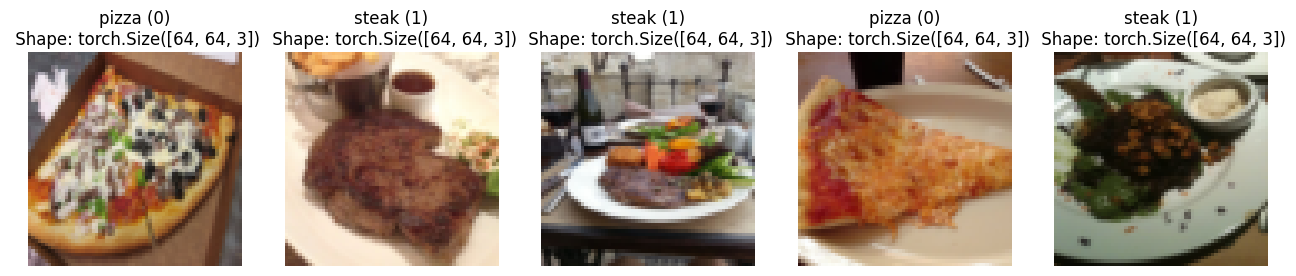

In [ ]:
display_random_imgs(train_data_custom,
                    classes=class_names,
                    n=5,
                    display_shape=True,
                    seed=42)

# Turn custom loaded images into `DataLoader`

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7d2841b59f10>,
 <torch.utils.data.dataloader.DataLoader at 0x7d28418be710>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

# Other form of transforms (data augmentation)

Data Augmentation - artifficially adding diversity to your train data

In [ ]:
from torchvision import transforms


train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [ ]:
img_path_list = list(image_path.glob("*/*/*.jpg"))
img_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg')]

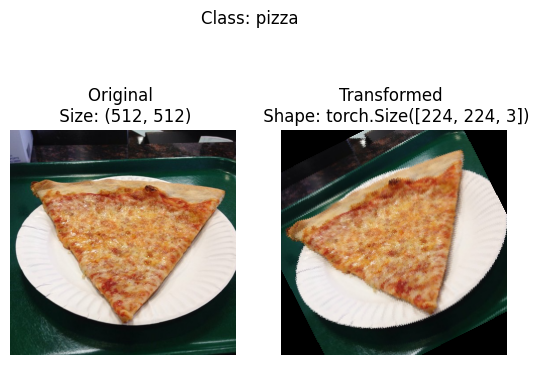

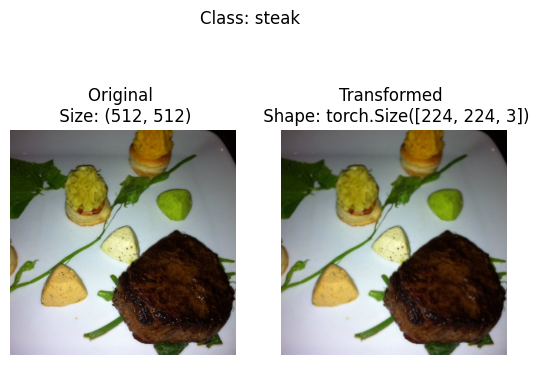

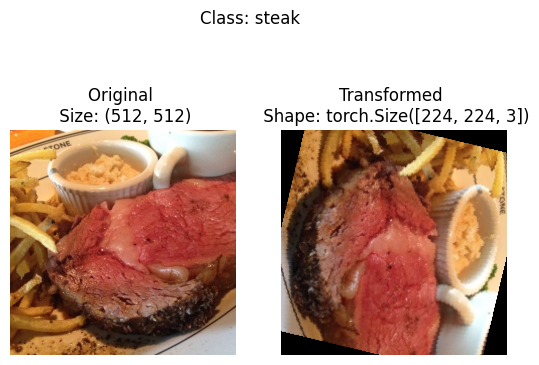

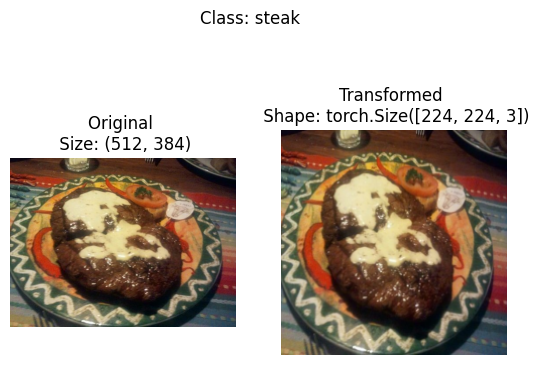

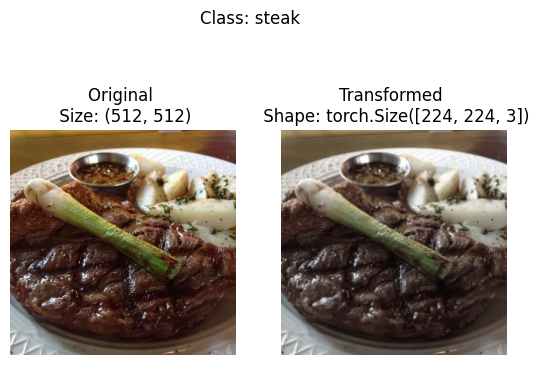

In [ ]:
plot_trans_imgs(image_paths=img_path_list,
                transform=train_transforms,
                n=5,
                seed=42)

# Model 0 : TinyVGG without data augmentation

* CNN Explainer model

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


In [ ]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform,
                                         target_transform=None)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform,
                                        target_transform=None)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS,
                                     pin_memory=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS,
                                    pin_memory=True)

In [ ]:
NUM_WORKERS

2

# Creating TinyVGG Model Class

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion - making gpu go brr

In [ ]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

# Try a forward pass on a single image


In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_single, label_single = image_batch[0].unsqueeze(dim=0), label_batch[0]
image_single.shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

# Using the `torchinfo` package


In [ ]:
!pip install torchinfo

In [ ]:
import torchinfo
from torchinfo import summary

summary(model_0, input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# Create a train and test loop fucntions

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X) # forward pass

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)



  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X) # forward pass

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc

# Creating a `train_function()` to combine `train_step()` and `test_step`

In [ ]:
from tqdm.auto import tqdm


def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          device=device,
          epochs: int=5):

  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    print(
        f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_acc:.4f} | "
        f"test_acc: {test_acc:.4f}"
    )

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)
loss_fn = nn.CrossEntropyLoss()

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 0.3011 | test_acc: 0.3011
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3281 | test_loss: 0.5417 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0869 | train_acc: 0.4883 | test_loss: 0.4924 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0844 | train_acc: 0.4023 | test_loss: 0.5833 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0663 | train_acc: 0.4180 | test_loss: 0.5644 | test_acc: 0.5644
Total training time: 8.635 seconds


# Plot the loss curves

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")

  plt.legend()




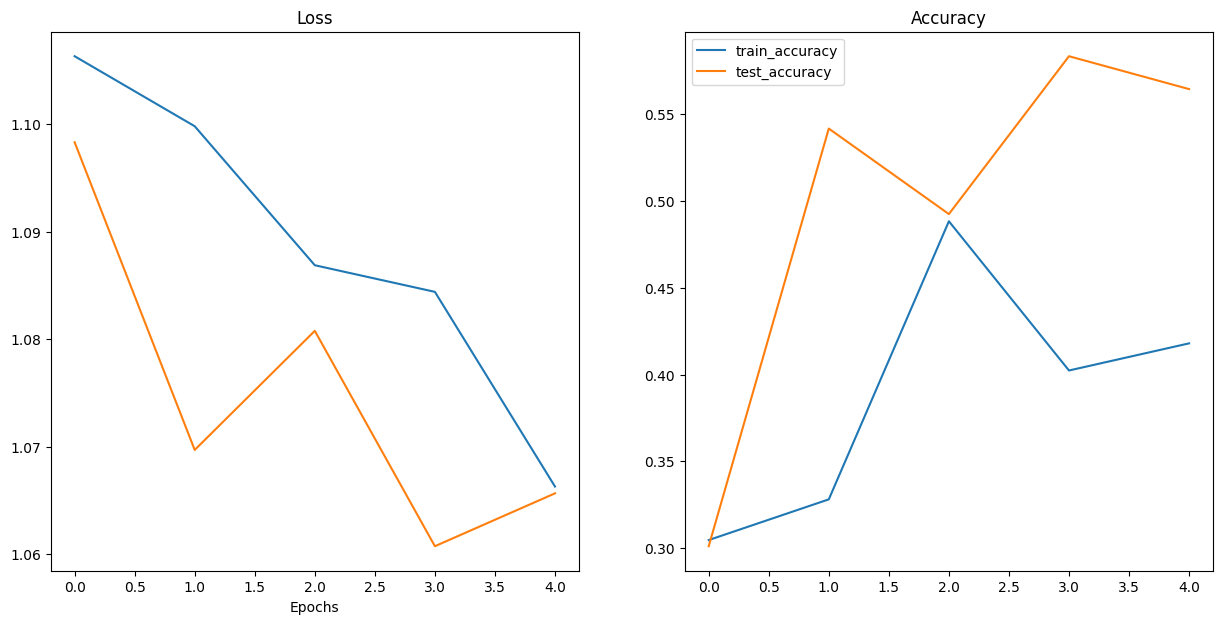

In [ ]:
plot_loss_curves(model_0_results)

# Just realized I was always able to do this - *vizualize, vizualize, vizualize...*


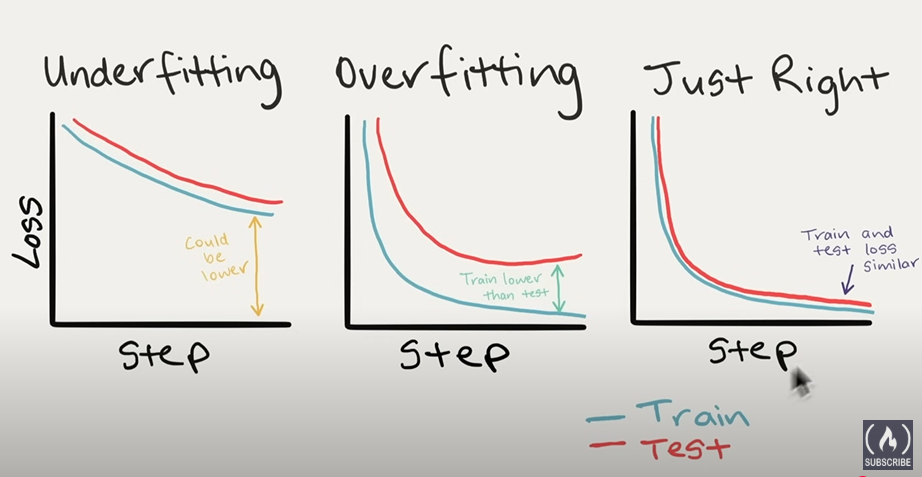

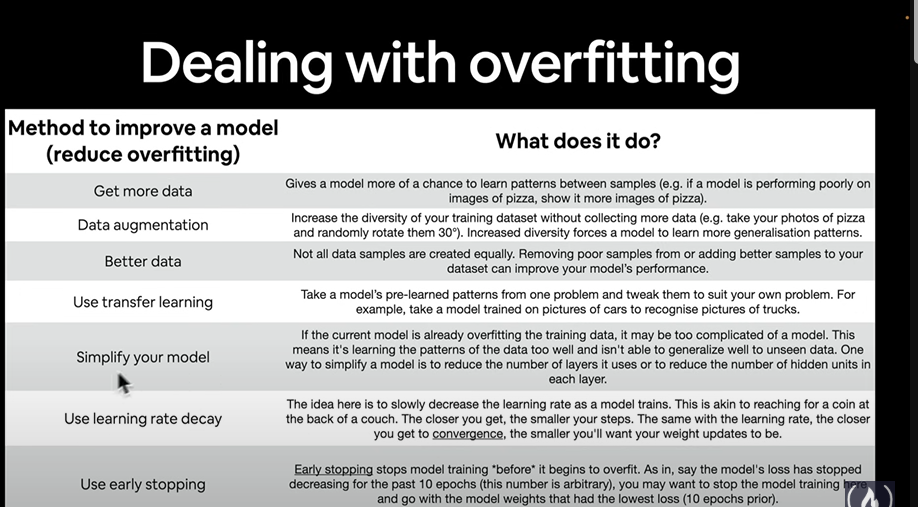

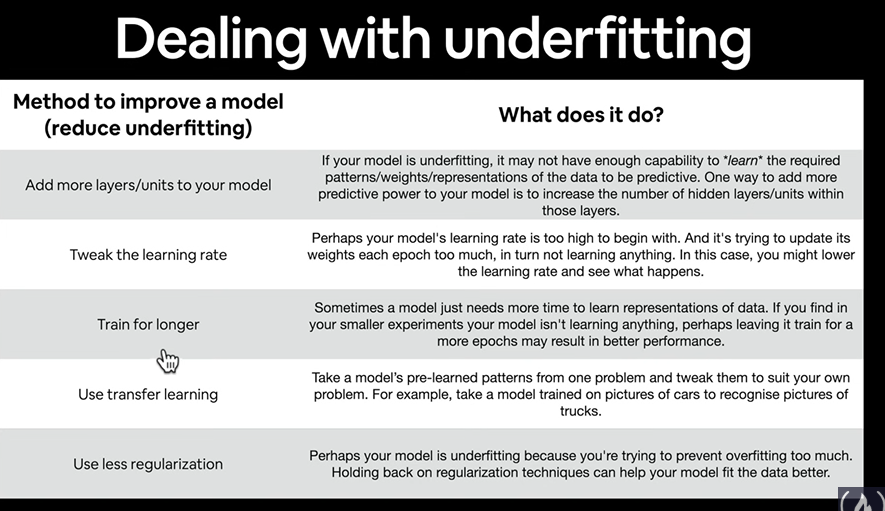

# Model 1: TinyVGG with Data Augmentation

In [ ]:
# create training transform with TrivialAugment

from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])


test_transform_trivial = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])


# Create train and test `Dataset`'s and `DataLoader`'s with data augmentation



In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform_trivial)

In [ ]:
# Turn Datasets into Dataloaders

import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(
    train_data_augmented,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_augmented = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [ ]:
NUM_WORKERS

2

# using same model arhitecture but using augemnted data

In [ ]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

from timeit import default_timer as timer
start_timer = timer()

model_1_results = train(model=model_1,
                train_dataloader=train_dataloader_augmented,
                test_dataloader=test_dataloader_augmented,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=NUM_EPOCHS,
                device=device)

end_time = timer()
print(f"Training time: {end_time - start_timer:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0820 | train_acc: 0.4570 | test_loss: 0.2917 | test_acc: 0.2917
Epoch: 2 | train_loss: 1.0672 | train_acc: 0.4453 | test_loss: 0.2708 | test_acc: 0.2708
Epoch: 3 | train_loss: 1.0139 | train_acc: 0.4453 | test_loss: 0.2708 | test_acc: 0.2708
Epoch: 4 | train_loss: 1.0503 | train_acc: 0.3789 | test_loss: 0.3021 | test_acc: 0.3021
Epoch: 5 | train_loss: 1.0246 | train_acc: 0.5156 | test_loss: 0.3333 | test_acc: 0.3333
Training time: 4.651 seconds


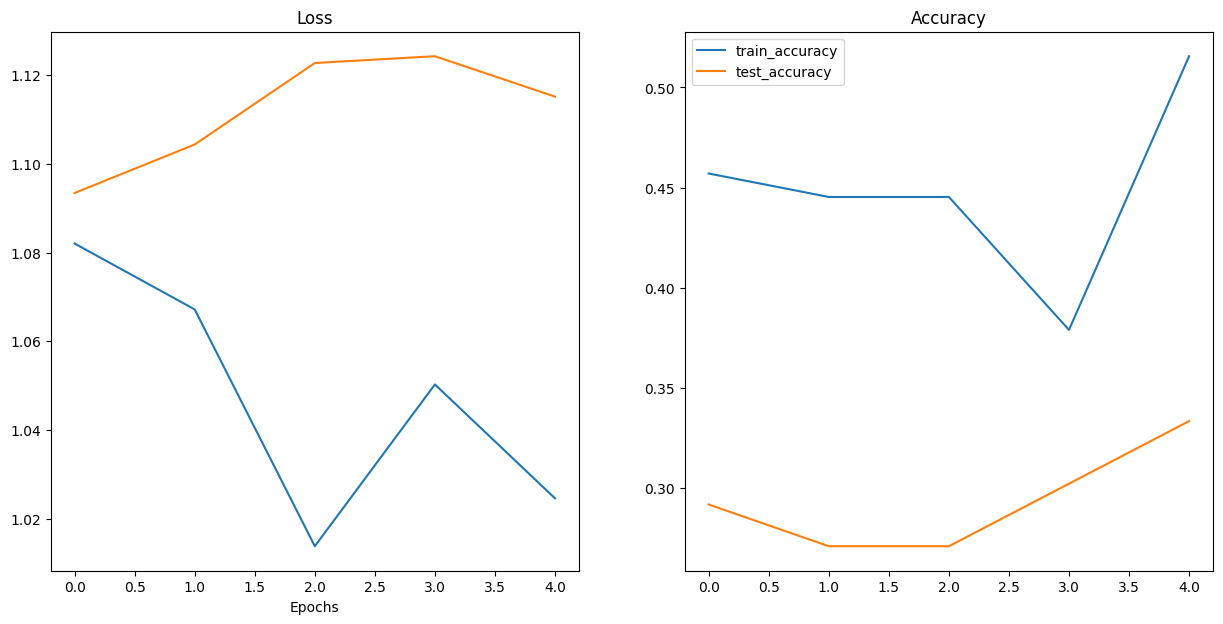

In [ ]:
plot_loss_curves(model_1_results)

* the test loss line is far higher
* also the accuracy for the training data is far higher

# Comparing model results

*   Hardcoded
*   PyTorch + TensorBoard
*   weights & biases
*   MLFlow




In [ ]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106319   0.304688   1.098323  0.301136
1    1.099808   0.328125   1.069702  0.541667
2    1.086880   0.488281   1.080778  0.492424
3    1.084404   0.402344   1.060748  0.583333
4    1.066298   0.417969   1.065665  0.564394

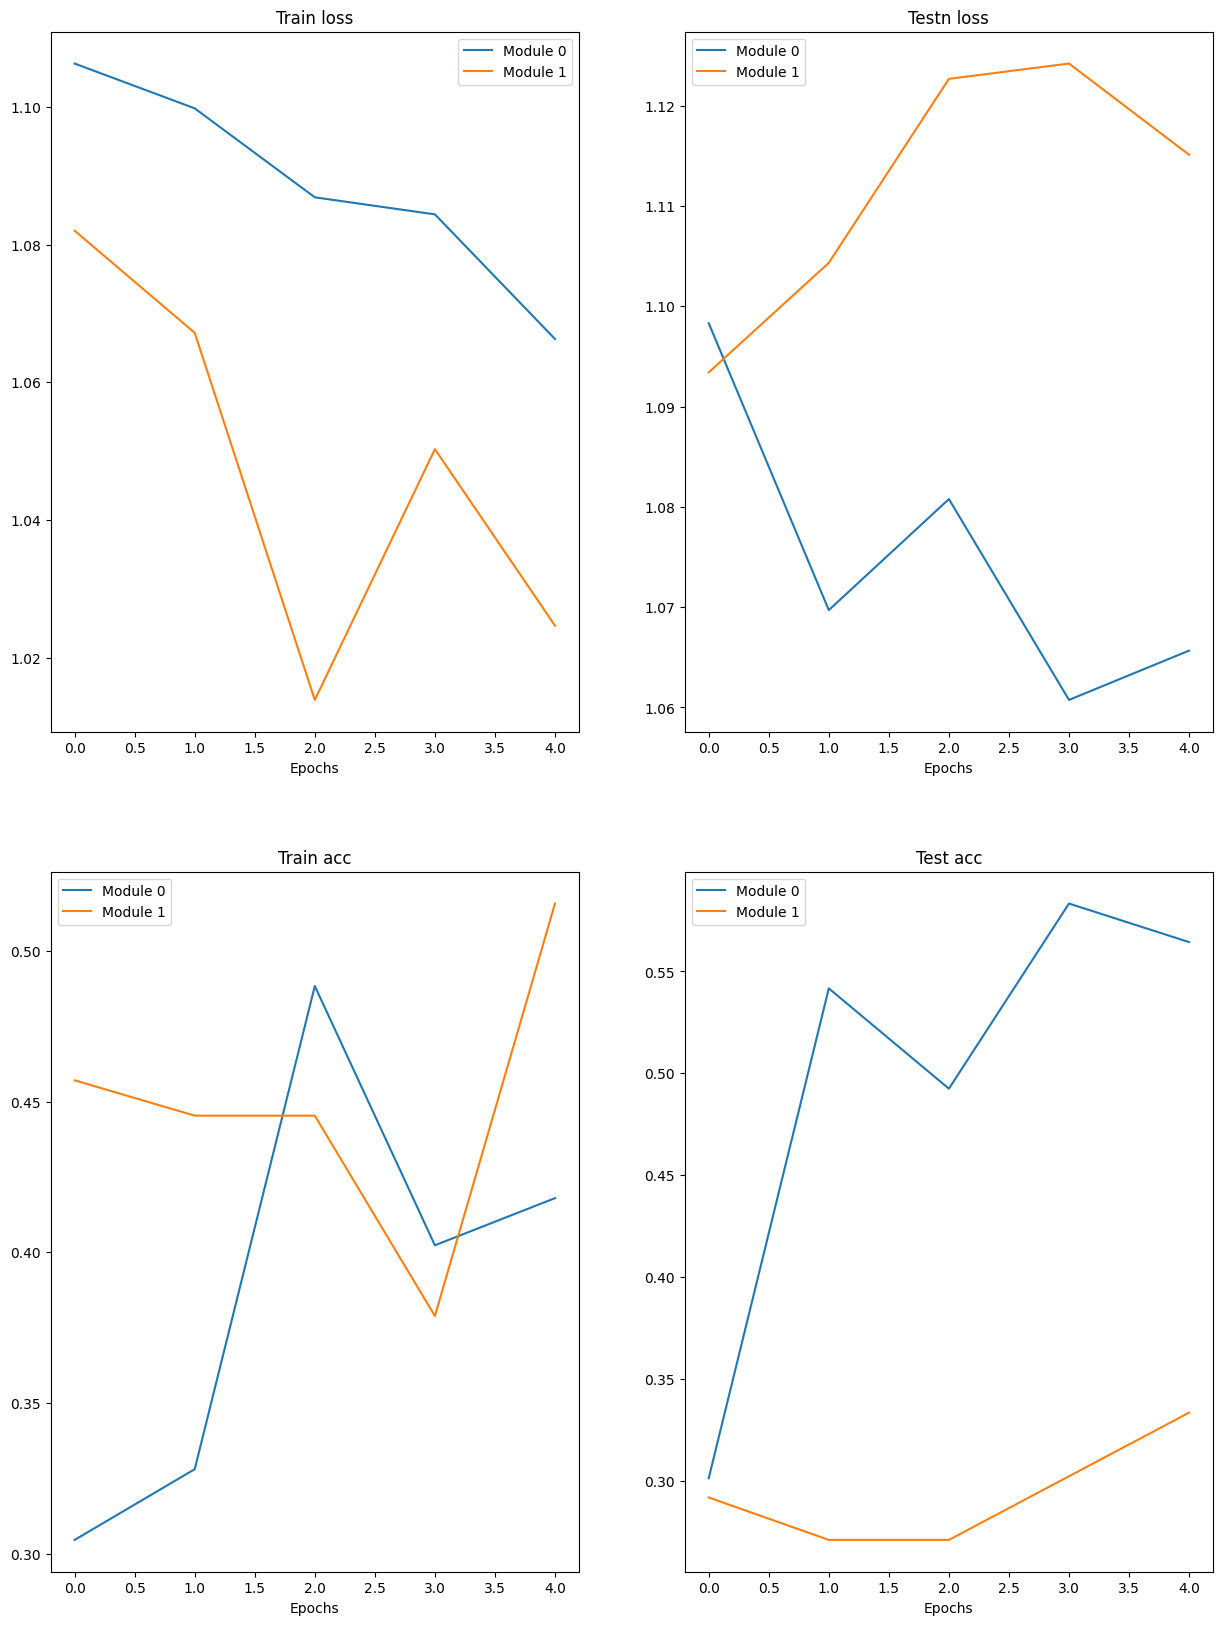

In [ ]:
plt.figure(figsize=(15,20))

epochs = range(len(model_0_df))

# Train Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df['train_loss'], label="Module 0")
plt.plot(epochs, model_1_df['train_loss'], label="Module 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# Test Loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df['test_loss'], label="Module 0")
plt.plot(epochs, model_1_df['test_loss'], label="Module 1")
plt.title("Testn loss")
plt.xlabel("Epochs")
plt.legend()


# Train Accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df['train_acc'], label="Module 0")
plt.plot(epochs, model_1_df['train_acc'], label="Module 1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

# Test Accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df['test_acc'], label="Module 0")
plt.plot(epochs, model_1_df['test_acc'], label="Module 1")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend()

# Making a prediction on a custom image

In [ ]:
# download custom img
import requests

custom_img_path = data_path / "04-pizza-dad.jpeg"

if not custom_img_path.is_file():
  with open(custom_img_path, "wb") as f:
   request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
   print("Downloading custom image...")

   f.write(request.content)
else:
  print(f"{custom_img_path} already exists{request}")


# Loading in a custom img with PyTorch

* in tensor form with datatype
* shape 64x64x3


In [ ]:
str(custom_img_path)

'data/04-pizza-dad.jpeg'

In [ ]:
import torchvision

custom_img = torchvision.io.read_image(str(custom_img_path))
custom_img

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

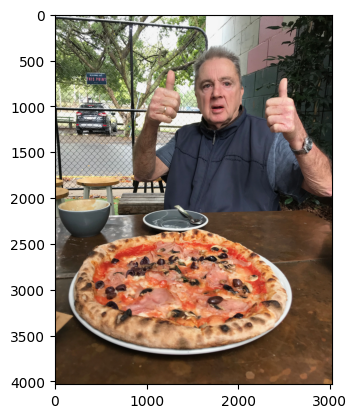

In [ ]:
plt.imshow(custom_img.permute(1, 2, 0))

In [ ]:
custom_img = custom_img.type(torch.float32) / 255
print(custom_img.shape)
custom_img_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

custom_img = custom_img_transform(custom_img)
print(custom_img.shape)

torch.Size([3, 4032, 3024])
torch.Size([3, 64, 64])


In [ ]:
model_1.eval()

with torch.inference_mode():
 custom_pred = model_1(custom_img.unsqueeze(0).to(device))

custom_pred

tensor([[-0.5395,  0.6435, -0.2813]], device='cuda:0')

In [ ]:
# convert logits

custom_pred_probs = torch.softmax(custom_pred, dim=1)
custom_pred_probs

tensor([[0.1799, 0.5872, 0.2329]], device='cuda:0')

In [ ]:
custom_pred_probs_labels = torch.argmax(custom_pred_probs, 1)
class_names[custom_pred_probs_labels]


'steak'

In [ ]:
def pred_plot_img(model: torch.nn.Module,
                  image_path: str,
                  class_names: List[str]=None,
                  transform=None,
                  device=device):
  target_img = torchvision.io.read_image(str(custom_img_path))
  target_img = target_img.type(torch.float32) / 255.
  if transform:
    target_img = transform(target_img)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_img = target_img.unsqueeze(0)
    target_img_pred = model(target_img.to(device))

  target_img_pred_probs = torch.softmax(target_img_pred, dim=1)
  target_img_pred_label = torch.argmax(target_img_pred_probs, dim=1)

  plt.imshow(target_img.squeeze().permute(1, 2, 0))
  plt.title(f"Pred: {class_names[target_img_pred_label.cpu()]} | Prob: {target_img_pred_probs.max().cpu():.3f}")
  plt.axis(False)

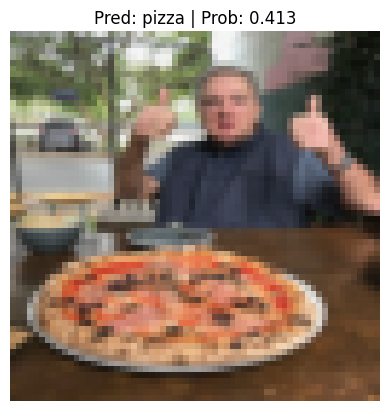

In [ ]:
pred_plot_img(model=model_1,
              image_path=custom_img_path,
              class_names=class_names,
              transform=custom_img_transform,
              device=device)

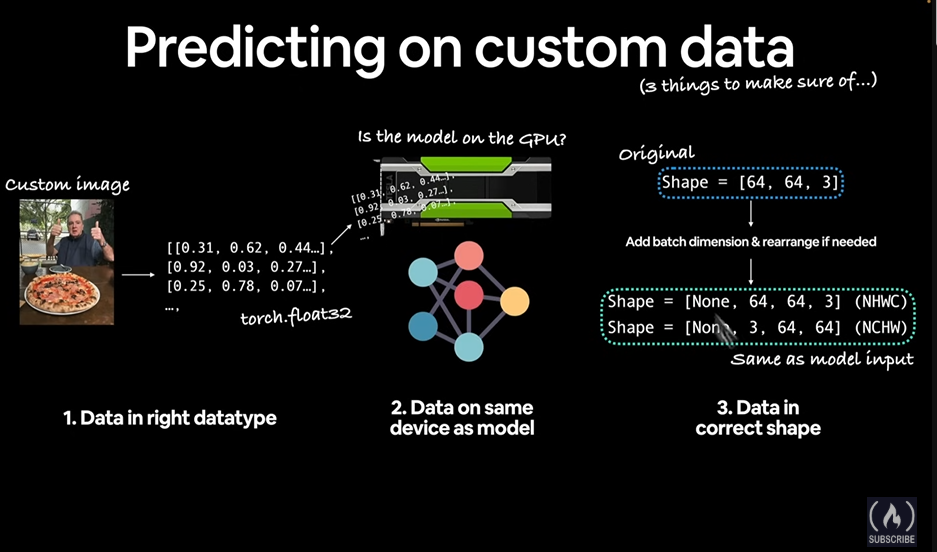